In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from math import sqrt

In [8]:
nba = pd.read_csv('./data/NBA_train.csv')
renamed = {'2PA': 'X2PA', '3PA': 'X3PA'}
nba.rename(columns=renamed, inplace=True)
nba.describe()

,SeasonEnd,Playoffs,W,PTS,oppPTS,FG,FGA,2P,X2PA,3P,X3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,1996.319760,0.574850,41.000000,8370.239521,8370.239521,3200.367665,6873.318563,2881.324551,5956.444311,319.043114,916.874251,1650.461078,2189.953293,1061.584431,2427.354491,1912.112575,668.364072,419.805988,1302.837126
std,9.243808,0.494662,12.740822,581.040114,587.543959,287.181266,401.027166,446.097941,830.596327,199.698941,523.982964,197.651728,244.491086,150.224519,130.671523,221.610925,93.393044,82.274913,153.973470
min,1980.000000,0.000000,11.000000,6901.000000,6909.000000,2565.000000,5972.000000,1981.000000,4153.000000,10.000000,75.000000,1189.000000,1475.000000,639.000000,2044.000000,1423.000000,455.000000,204.000000,931.000000
25%,1989.000000,0.000000,31.000000,7934.000000,7934.000000,2974.000000,6563.500000,2510.000000,5269.000000,131.500000,413.000000,1502.500000,2008.000000,953.500000,2346.500000,1735.000000,599.000000,359.000000,1192.000000
50%,1996.000000,1.000000,42.000000,8312.000000,8365.000000,3150.000000,6831.000000,2718.000000,5706.000000,329.000000,942.000000,1628.000000,2176.000000,1055.000000,2433.000000,1899.000000,658.000000,410.000000,1289.000000
75%,2005.000000,1.000000,50.500000,8784.500000,8768.500000,3434.500000,7157.000000,3296.000000,6753.500000,481.500000,1347.500000,1781.000000,2352.000000,1167.000000,2516.500000,2077.500000,729.000000,469.500000,1395.500000
max,2011.000000,1.000000,72.000000,10371.000000,10723.000000,3980.000000,8868.000000,3954.000000,7873.000000,841.000000,2284.000000,2388.000000,3051.000000,1520.000000,2753.000000,2575.000000,1053.000000,716.000000,1873.000000


In [9]:
# how many games does a team need to win in order to make the playoffs?

nba.groupby(['W', 'Playoffs']).size().sort_values(ascending=False)


W   Playoffs
50  1           32
42  1           29
47  1           28
44  1           27
41  1           26
55  1           24
57  1           23
45  1           22
52  1           20
30  0           19
28  0           18
43  1           18
24  0           18
54  1           18
36  0           17
49  1           17
33  0           17
53  1           17
26  0           17
56  1           16
34  0           16
46  1           15
31  0           15
37  0           15
59  1           14
48  1           14
58  1           13
35  0           13
62  1           13
40  1           13
                ..
19  0           10
61  1           10
40  0            9
60  1            8
42  0            8
38  0            8
63  1            7
38  1            7
18  0            5
36  1            4
37  1            4
67  1            4
35  1            3
45  0            3
64  1            3
65  1            3
14  0            2
12  0            2
16  0            2
13  0            2
11  0            2

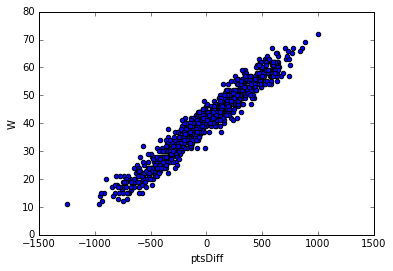

In [10]:
# So in basketball, games are won by scoring more points than the other team.
# Can we use the difference between points scored and points allowed throughout the regular season in order
# to predict the number of games that a team will win?

nba['ptsDiff'] = nba.PTS - nba.oppPTS
nba.plot('ptsDiff', 'W', kind='scatter')

It looks like there's an incredibly strong linear relationship

In [11]:
wins_reg = sm.ols(formula='W ~ ptsDiff', data=nba)
fitting_wins = wins_reg.fit()
fitting_wins.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.361e+04
Date:                Wed, 29 Jun 2016   Prob (F-statistic):               0.00
Time:                        22:53:08   Log-Likelihood:                -2118.0
No. Observations:                 835   AIC:                             4240.
Df Residuals:                     833   BIC:                             4249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     41.0000      0.106    387.027      0.000        40.792    41.208
ptsDiff        0.0326      0.000    116.681      0.000         0.032     0.033
==============================================================================
Omnibus:                        0.985   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                0.946
Skew:                           0.082   Prob(JB):                        0.623
Kurtosis:                       3.006   Cond. No.                         379.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The equation is:

W = 41 + 0.0326 * ptsDiff

## Points Scored

Let's predict points scored

In [14]:
points_reg = sm.ols(formula='PTS ~ X2PA + X3PA + FTA + AST + ORB + DRB + TOV + STL + BLK', data=nba)
fitting_points = points_reg.fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     817.3
Date:                Wed, 29 Jun 2016   Prob (F-statistic):               0.00
Time:                        22:59:09   Log-Likelihood:                -5541.1
No. Observations:                 835   AIC:                         1.110e+04
Df Residuals:                     825   BIC:                         1.115e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2050.8108    203.487    -10.078      0.000     -2450.223 -1651.398
X2PA           1.0429      0.030     35.274      0.000         0.985     1.101
X3PA           1.2586      0.038     32.747      0.000         1.183     1.334
FTA            1.1280      0.034     33.440      0.000         1.062     1.194
AST            0.8858      0.044     20.150      0.000         0.799     0.972
ORB           -0.9554      0.078    -12.261      0.000        -1.108    -0.802
DRB            0.0388      0.062      0.631      0.528        -0.082     0.160
TOV           -0.0248      0.061     -0.405      0.686        -0.145     0.095
STL           -0.1992      0.092     -2.169      0.030        -0.379    -0.019
BLK           -0.0558      0.088     -0.635      0.526        -0.228     0.117
==============================================================================
Omnibus:                        1.265   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.531   Jarque-Bera (JB):                1.301
Skew:                          -0.094   Prob(JB):                        0.522
Kurtosis:                       2.951   Cond. No.                     2.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# let's calculate the SSE with the residuals
SSE = sum(fitting_points.resid**2)
SSE

28394313.994756624

In [22]:
# Well... it's not very interpretable quantity :)
# What about Root Mean Square Error? It's more interpretable.
RMSE = sqrt(SSE/len(nba))
RMSE

184.4048981474906

In [26]:
# It's our average error... 184.4 points
# is quite a lot... but we must see the average points in a season
np.mean(nba.PTS)

8370.2395209580845

In [28]:
# WOW! A big number. The error it's not so bad

# Well, now we should look at our model and see if has some attributes that can be removed.
# We start looking at P values. It seems that Turnovers is the highest of all P values (0.6859)
# Meaning that turnovers is the least statistically significant variable in our model
fitting_points.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     817.3
Date:                Wed, 29 Jun 2016   Prob (F-statistic):               0.00
Time:                        23:13:21   Log-Likelihood:                -5541.1
No. Observations:                 835   AIC:                         1.110e+04
Df Residuals:                     825   BIC:                         1.115e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2050.8108    203.487    -10.078      0.000     -2450.223 -1651.398
X2PA           1.0429      0.030     35.274      0.000         0.985     1.101
X3PA           1.2586      0.038     32.747      0.000         1.183     1.334
FTA            1.1280      0.034     33.440      0.000         1.062     1.194
AST            0.8858      0.044     20.150      0.000         0.799     0.972
ORB           -0.9554      0.078    -12.261      0.000        -1.108    -0.802
DRB            0.0388      0.062      0.631      0.528        -0.082     0.160
TOV           -0.0248      0.061     -0.405      0.686        -0.145     0.095
STL           -0.1992      0.092     -2.169      0.030        -0.379    -0.019
BLK           -0.0558      0.088     -0.635      0.526        -0.228     0.117
==============================================================================
Omnibus:                        1.265   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.531   Jarque-Bera (JB):                1.301
Skew:                          -0.094   Prob(JB):                        0.522
Kurtosis:                       2.951   Cond. No.                     2.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# New model without turnovers
points_reg = sm.ols(formula='PTS ~ X2PA + X3PA + FTA + AST + ORB + DRB + STL + BLK', data=nba)
fitting_points = points_reg.fit()
fitting_points.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     920.4
Date:                Wed, 29 Jun 2016   Prob (F-statistic):               0.00
Time:                        23:14:24   Log-Likelihood:                -5541.2
No. Observations:                 835   AIC:                         1.110e+04
Df Residuals:                     826   BIC:                         1.114e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2076.6782    193.084    -10.755      0.000     -2455.672 -1697.684
X2PA           1.0435      0.030     35.366      0.000         0.986     1.101
X3PA           1.2627      0.037     34.099      0.000         1.190     1.335
FTA            1.1254      0.033     34.023      0.000         1.060     1.190
AST            0.8861      0.044     20.173      0.000         0.800     0.972
ORB           -0.9582      0.078    -12.350      0.000        -1.110    -0.806
DRB            0.0389      0.062      0.632      0.527        -0.082     0.160
STL           -0.2068      0.090     -2.301      0.022        -0.383    -0.030
BLK           -0.0586      0.087     -0.670      0.503        -0.230     0.113
==============================================================================
Omnibus:                        1.258   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.533   Jarque-Bera (JB):                1.296
Skew:                          -0.093   Prob(JB):                        0.523
Kurtosis:                       2.950   Cond. No.                     2.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# It seems that R2 have kept the same value. Good. Is there another attribute that could be exterminated?
# Maybe Defensive rebounds (p value 0.527). Let's create another model without it.
points_reg = sm.ols(formula='PTS ~ X2PA + X3PA + FTA + AST + ORB + STL + BLK', data=nba)
fitting_points = points_reg.fit()
fitting_points.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     1053.
Date:                Wed, 29 Jun 2016   Prob (F-statistic):               0.00
Time:                        23:17:32   Log-Likelihood:                -5541.4
No. Observations:                 835   AIC:                         1.110e+04
Df Residuals:                     827   BIC:                         1.114e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2015.4630    167.009    -12.068      0.000     -2343.274 -1687.652
X2PA           1.0483      0.029     36.753      0.000         0.992     1.104
X3PA           1.2708      0.035     36.568      0.000         1.203     1.339
FTA            1.1285      0.033     34.506      0.000         1.064     1.193
AST            0.8909      0.043     20.597      0.000         0.806     0.976
ORB           -0.9702      0.075    -12.903      0.000        -1.118    -0.823
STL           -0.2276      0.084     -2.724      0.007        -0.392    -0.064
BLK           -0.0388      0.082     -0.475      0.635        -0.199     0.121
==============================================================================
Omnibus:                        1.168   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.558   Jarque-Bera (JB):                1.208
Skew:                          -0.090   Prob(JB):                        0.546
Kurtosis:                       2.948   Cond. No.                     1.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# Again, R2 not changed. Let's remove Block
points_reg = sm.ols(formula='PTS ~ X2PA + X3PA + FTA + AST + ORB + STL', data=nba)
fitting_points = points_reg.fit()
fitting_points.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     1229.
Date:                Wed, 29 Jun 2016   Prob (F-statistic):               0.00
Time:                        23:18:58   Log-Likelihood:                -5541.5
No. Observations:                 835   AIC:                         1.110e+04
Df Residuals:                     828   BIC:                         1.113e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2032.7164    162.942    -12.475      0.000     -2352.544 -1712.889
X2PA           1.0500      0.028     37.117      0.000         0.994     1.105
X3PA           1.2731      0.034     37.001      0.000         1.206     1.341
FTA            1.1273      0.033     34.581      0.000         1.063     1.191
AST            0.8884      0.043     20.701      0.000         0.804     0.973
ORB           -0.9743      0.075    -13.051      0.000        -1.121    -0.828
STL           -0.2268      0.084     -2.717      0.007        -0.391    -0.063
==============================================================================
Omnibus:                        1.174   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.556   Jarque-Bera (JB):                1.222
Skew:                          -0.089   Prob(JB):                        0.543
Kurtosis:                       2.942   Cond. No.                     1.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# R2 it's the same.
# What about the error? Let's see.
SSE = sum(fitting_points.resid**2)
RMSE = sqrt(SSE/len(nba))
RMSE

184.49304179347197

In [34]:
# We have kept the RMSE the same, got a simpler model and more interpretable.

## Making predictions

In [37]:
nba_test = pd.read_csv('./data/NBA_test.csv')
nba_test.rename(columns=renamed, inplace=True)

In [38]:
points_prediction = fitting_points.predict(nba_test)

In [40]:
# To see if our model is good we could compare with the training R2 (0.8991)
SSE = sum((points_prediction - nba_test.PTS)**2)
SST = sum((np.mean(nba.PTS) - nba_test.PTS)**2)
R2 = 1 - SSE/SST
R2

0.81271418527712735

In [42]:
RMSE = sqrt(SSE/len(nba_test))
RMSE

196.3723439642661